<a href="https://colab.research.google.com/github/CastilloGabriela/Hands-On-Data-Preprocessing-in-Python/blob/main/Actividad8RLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---


NOMBRE: 
*   Nancy Gabriela González Castillo 
*   Rodia Zuriel Tejeda Moreno  
*   Dafne Avelín Durón Castán 

MATRÍCULA: 
*   A01794546
*   A01260437 
*   A00823833  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/semana 8" #Nancy
#DIR = "/content/drive/MyDrive/Colab Notebooks/Ciencia y Analítica de datos/Semana 8" #Dafne
#DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analitica de datos/Semana 8" #Rodia
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe. 

In [6]:
print("Estadísticas descriptivas de variables cuantitativas:\n", insurance_df.describe(), '\n')
print("Estadísticas descriptivas de variables categóricas:\n", insurance_df.describe(include = "object"), '\n')

Estadísticas descriptivas de variables cuantitativas:
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010 

Estadísticas descriptivas de variables categóricas:
          sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364 



1b) Búsqueda de valores faltantes.

In [7]:
print("Porcentaje de datos faltantes por columna:\n", (insurance_df.isna().sum()*100)/len(insurance_df), '\n')
print("Porcentaje de datos faltantes total", (insurance_df.isna().sum().sum()*100)/insurance_df.size,'%', '\n')

Porcentaje de datos faltantes por columna:
 age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64 

Porcentaje de datos faltantes total 0.0 % 



1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas. 

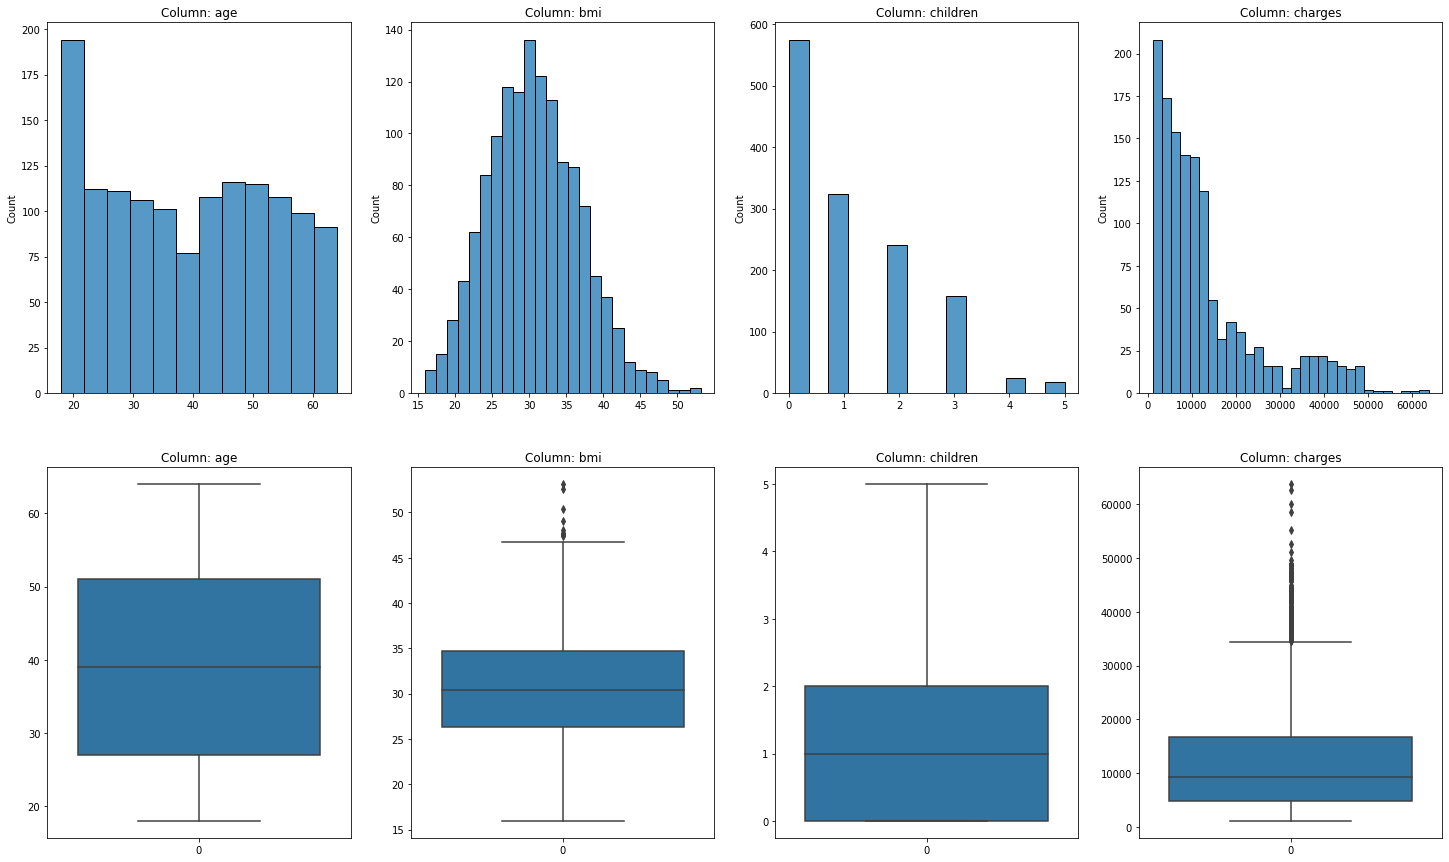

In [8]:
i = insurance_df.select_dtypes(include=['int', 'float']).columns
c = i.append(i)

fig, axes = plt.subplots(nrows=2, ncols=len(i), figsize=(25, 15), sharex=False, sharey=False)
axes = axes.ravel()

x = 0
for col, ax in zip(c, axes):
    if(x < len(i)):
      sns.histplot(data=insurance_df[col], ax=ax)
    else:
      sns.boxplot(data=insurance_df[col], ax=ax)
    ax.set(title=f'Column: {col}', xlabel=None)
    x = x + 1

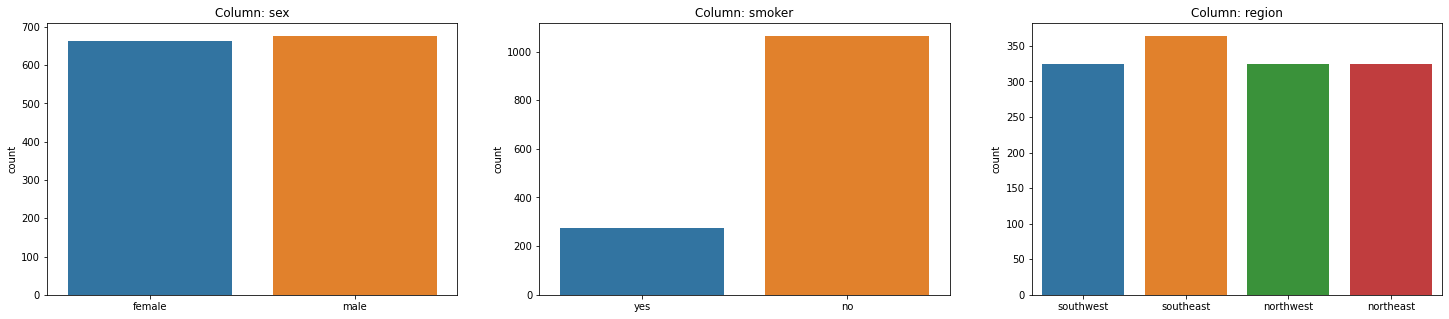

In [9]:
o = insurance_df.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(nrows=1, ncols=len(o), figsize=(25, 5), sharex=False, sharey=False)
axes = axes.ravel()

for col, ax in zip(o, axes):
  sns.countplot(x=col,data=insurance_df, ax=ax)
  ax.set(title=f'Column: {col}', xlabel=None)

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo?Compara la distribución de la variable `charges` por medio de un boxplot. 

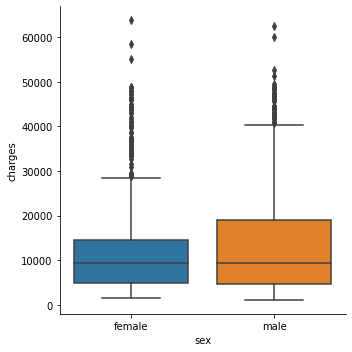

In [10]:
sns.catplot(data=insurance_df, x="sex", y="charges", kind="box")
# A pesar de que la prima media es similar en ambos sexos y no existen diferencias significativas, los hombres tienen tendencia a que sea mayor
# pues las mujeres presentan una mayor cantidad de outliers en primas altas.

In [11]:
insurance_df['charges'].mean()

13270.422265141257

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico? 

<AxesSubplot:xlabel='bmi', ylabel='charges'>

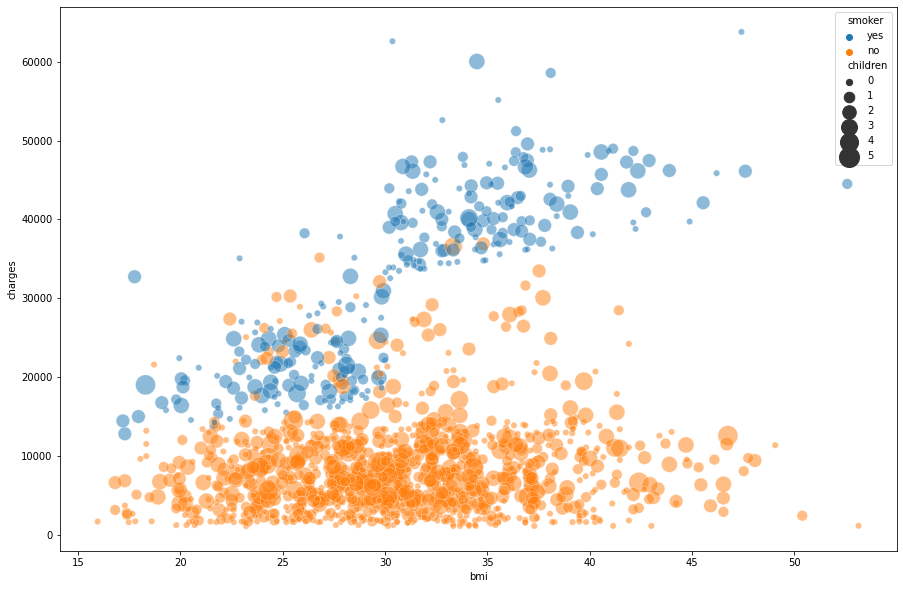

In [12]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=insurance_df, x='bmi', y='charges', hue="smoker", size="children", sizes=(40, 400), alpha=0.5)
# Se puede observar que los fumadores tienen cantidades de charges más altos así como también de bmi.
# También se puede observar que los no fumadores tienen más hijos, un bmi entre 20 y 40 y menos charges.

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas. 

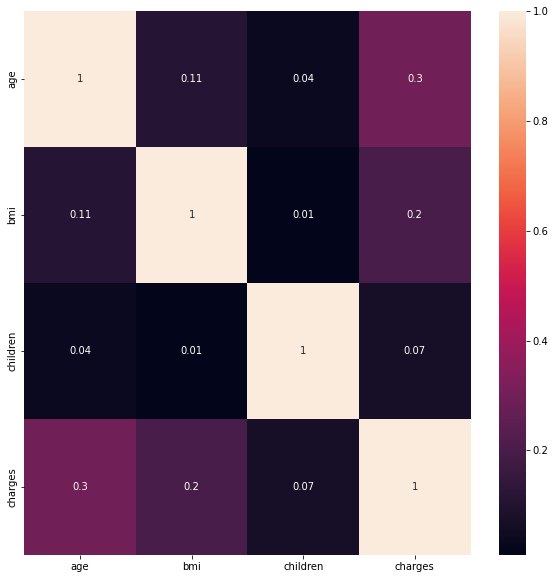

In [13]:
plt.figure(figsize=(10, 10))
correlation = insurance_df.corr(method='pearson')
sns.heatmap(round(correlation,2), annot=True)
plt.show()

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`. 

3a) ¿Cuál es el promedio de `age` y de `bmi`? 

In [14]:
percentile_25 = insurance_df["charges"].quantile(0.25)
percentile_75 = insurance_df["charges"].quantile(0.75)

iqr = percentile_75 - percentile_25

upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr

IQR_outliers_charges = insurance_df[(insurance_df["charges"] <= lower_limit) | (insurance_df["charges"] >= upper_limit)]
IQR_outliers_charges

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [15]:
print("El promedio de age del dataframe original es:", insurance_df['age'].mean())
print("El promedio de age de los outliners de charge es:", IQR_outliers_charges['age'].mean(), '\n')

print("El promedio de bmi del dataframe original es:", insurance_df['bmi'].mean())
print("El promedio de bmi de los outliners de charge es:", IQR_outliers_charges['bmi'].mean())

El promedio de age del dataframe original es: 39.20702541106129
El promedio de age de los outliners de charge es: 41.07913669064748 

El promedio de bmi del dataframe original es: 30.66339686098655
El promedio de bmi de los outliners de charge es: 35.564604316546756


3b) ¿Qué porcentaje de estas observaciones se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores? 

In [16]:
print("El porcentaje correspondiente en mujeres y hombres es:\n", (IQR_outliers_charges['sex'].value_counts() * 100 )/ insurance_df['sex'].value_counts(), '\n')
print("El porcentaje correspondiente en fumadores y no fumadores es:\n", (IQR_outliers_charges['smoker'].value_counts() * 100 )/ insurance_df['smoker'].value_counts())

El porcentaje correspondiente en mujeres y hombres es:
 male      13.16568
female     7.55287
Name: sex, dtype: float64 

El porcentaje correspondiente en fumadores y no fumadores es:
 no      0.281955
yes    49.635036
Name: smoker, dtype: float64


# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`). 

In [17]:
y = insurance_df.loc[:,'charges'] # variable de salida
x = insurance_df.iloc[:,0:-1] # predictores (numéricos y categóricos)

5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción. 

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, stratify=insurance_df["smoker"], random_state=1)

6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# seleccionar las características numéricas y aplicar MinMaxScaler
num_features = x.select_dtypes(include=['int', 'float']).columns
num_transformer = MinMaxScaler(feature_range=(-1, 1))

# seleccionar las características categóricas y aplicar OneHotEncoder
cat_features = x.select_dtypes(include=['object']).columns
cat_transformer = OneHotEncoder(sparse_output=False)

preprocessing = ColumnTransformer(transformers=[('num', num_transformer, num_features),('cat', cat_transformer, cat_features)])

In [20]:
preprocessing

ColumnTransformer(transformers=[('num', MinMaxScaler(feature_range=(-1, 1)),
                                 Index(['age', 'bmi', 'children'], dtype='object')),
                                ('cat', OneHotEncoder(sparse_output=False),
                                 Index(['sex', 'smoker', 'region'], dtype='object'))])

# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`. 

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

lr_model = Pipeline([
    ("preprocessing", preprocessing),
    ("regressor", LinearRegression())
])
lr_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  MinMaxScaler(feature_range=(-1,
                                                                              1)),
                                                  Index(['age', 'bmi', 'children'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  Index(['sex', 'smoker', 'region'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

lr_model.fit(xtrain, ytrain)
lin_reg_y_predicted = lr_model.predict(xtest)

lin_reg_rmse = np.sqrt(mean_squared_error(ytest, lin_reg_y_predicted, squared = False))
print('RMSE:', lin_reg_rmse)

lin_reg_r2 = r2_score(ytest, lin_reg_y_predicted)
print('R2:', lin_reg_r2)

RMSE: 75.48988498058603
R2: 0.7538579221120164


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`. 


In [23]:
ytrain[(ytrain >= upper_limit)] = upper_limit
ytest[(ytest >= upper_limit)] = upper_limit

In [24]:
lr_model2 = Pipeline([
    ("preprocessing", preprocessing),
    ("regressor", LinearRegression())
])

lr_model2.fit(xtrain, ytrain)
lrm2_y_predicted = lr_model2.predict(xtest)

lrm2_rmse = np.sqrt(mean_squared_error(ytest, lrm2_y_predicted, squared = False))
print('RMSE lr_model2:', lrm2_rmse)

lrm2_r2 = r2_score(ytest, lrm2_y_predicted)
print('R2 lr_model2:', lrm2_r2)

RMSE lr_model2: 69.34130979343264
R2 lr_model2: 0.7641549343514591


9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`. 

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [25]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

preprocessing2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OrdinalEncoder(), cat_features)])

lr_model3 = Pipeline(steps=[
    ('preprocessing2', preprocessing2),
    ('regressor', LinearRegression())
])

lr_model3.fit(xtrain, ytrain)
lrm3_y_predicted = lr_model3.predict(xtest)

lrm3_rmse = np.sqrt(mean_squared_error(ytest, lrm3_y_predicted, squared = False))
print('RMSE lr_model3:', lrm3_rmse)

lrm3_r2 = r2_score(ytest, lrm3_y_predicted)
print('R2 lr_model3:', lrm3_r2)

RMSE lr_model3: 69.36570240728811
R2 lr_model3: 0.7638229005936741


10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree=2, include_bias=False)

preprocessing3 = ColumnTransformer(
    transformers=[
        ('num', poly_transformer, num_features),
        ('cat', cat_transformer, cat_features)
        ])

lr_model4 = Pipeline(steps=[
    ('preprocessing3', preprocessing3),
    ('regressor', LinearRegression())
])

lr_model4.fit(xtrain, ytrain)
lrm4_y_predicted = lr_model4.predict(xtest)

lrm4_rmse = np.sqrt(mean_squared_error(ytest, lrm4_y_predicted, squared = False))
print('RMSE lr_model4:', lrm4_rmse)

lrm4_r2 = r2_score(ytest, lrm4_y_predicted)
print('R2 lr_model4:', lrm4_r2)

RMSE lr_model4: 69.10215308036132
R2 lr_model4: 0.7673918387182785


Best degree 2 with RMSE 4775.10756034169


Text(0, 0.5, 'RMSE')

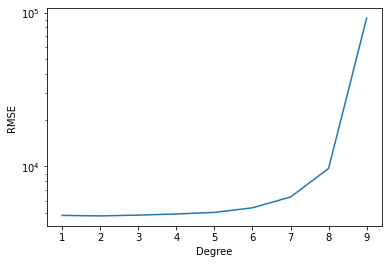

In [27]:
# Para comprobar que nuestra prueba fuera correcta corrimos el siguiente código:

rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:
  poly_transformer = PolynomialFeatures(degree=deg, include_bias=False)

  preprocessing3 = ColumnTransformer(
      transformers=[
          ('num', poly_transformer, num_features),
          ('cat', cat_transformer, cat_features)
          ])

  lr_model4 = Pipeline(steps=[
      ('preprocessing3', preprocessing3),
      ('regressor', LinearRegression())
  ])

  lr_model4.fit(xtrain, ytrain)
  lrm4_y_predicted = lr_model4.predict(xtest)

  lrm4_rmse = np.sqrt(mean_squared_error(ytest, lrm4_y_predicted))   
  rmses.append(lrm4_rmse) 

  if min_rmse > lrm4_rmse:
    min_rmse = lrm4_rmse
    min_deg = deg

print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))

plt.plot(degrees, rmses)
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('RMSE')